#### Recording
https://us02web.zoom.us/rec/component-page?action=viewdetailpage&sharelevel=meeting&useWhichPasswd=meeting&clusterId=us02&componentName=need-password&meetingId=f9g_7gA0gsrCISwLlYSripjfkHL7wmbypHbP7lMZLRIA_E1AFV1h-y9JR1DYUsyG.QTxyqgQaa0EZSlT0&originRequestUrl=https%3A%2F%2Fus02web.zoom.us%2Frec%2Fshare%2FkWSDgEjle3Dqj8kNsRrI1b41CuIFZYfNGKy0ZIuMeV3aTGGHpOtvTG2WulsI2UKs.IY1Wu8V5BVmLsUut%3FstartTime%3D1687832328000
    
Password: d8+giMQz

#### Overview

- Choose a corpus of interest. 
- How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way). 
- Taking the most common words, how many unique words represent half of the total words in the corpus? 
- Identify the 200 highest frequency words in this corpus. 
- Create a graph that shows the relative frequency of these 200 words. 
- Does the observed relative frequency of these words follow Zipf’s law?  Explain. 
- In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

#### Here, we answer the above using the NLTK State of the Union corpus.

There are many speeches within the corpus, but here we just print a subset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import state_union as su

files = su.fileids()

print(files[:5], files[-5:])

['1945-Truman.txt', '1946-Truman.txt', '1947-Truman.txt', '1948-Truman.txt', '1949-Truman.txt'] ['2002-GWBush.txt', '2003-GWBush.txt', '2004-GWBush.txt', '2005-GWBush.txt', '2006-GWBush.txt']


#### How many total unique words are in the corpus? 
We ran a quick for loop on all unique sets of words in each file in the corpus. We made sure to avoid any punctuation or non-word characters, as well as duplication caused by case.

In [4]:
unique_words = [word for word in set([w.lower() for w in su.words() if w.isalpha()])]

print("Total number of unique words in this State of the Union corpus:", len(unique_words), end='\n\n')

print("Total number of words together:", len([word for word in [w.lower() for w in su.words() if w.isalpha()]]))

['president', 'harry', 's', 'truman', 's', 'address', 'before', 'a', 'joint', 'session', 'of', 'the', 'congress', 'april', 'mr', 'speaker', 'mr', 'president', 'members', 'of']


#### Taking the most common words, how many unique words represent half of the total words in the corpus?

78 of the most common words in the corpus represent half of the total words therein.

In [3]:
total_words = [word for word in [w.lower() for w in su.words() if w.isalpha()]]
len(total_words)

total_word_freqs = nltk.FreqDist(total_words)
total_word_freqs

total = 0
count = 0
for word,freq in total_word_freqs.most_common():
    total+=freq
    count+=1
    if total > (0.5*len(total_words)):
        #print(count, '.', word, ':', freq, '-', total)
        count-=1
        break
    
print(count)

78


#### Identify the 200 highest frequency words in this corpus.

In [84]:
top200 = total_word_freqs.most_common(200)
#for word, freq in top200:
    #print(word, freq, sep=': ', end=',  ')

print(top200)

[('the', 20914), ('of', 13004), ('and', 12828), ('to', 12156), ('in', 7657), ('we', 6405), ('a', 6118), ('our', 5697), ('that', 4505), ('for', 4356), ('is', 3625), ('i', 3398), ('will', 2971), ('this', 2960), ('have', 2487), ('be', 2483), ('it', 2428), ('are', 2276), ('on', 1977), ('with', 1937), ('as', 1904), ('by', 1802), ('all', 1716), ('not', 1604), ('must', 1569), ('s', 1495), ('but', 1445), ('more', 1405), ('can', 1402), ('their', 1319), ('people', 1313), ('has', 1240), ('world', 1213), ('you', 1196), ('they', 1133), ('new', 1112), ('year', 1104), ('from', 1093), ('america', 1079), ('congress', 1078), ('at', 1075), ('us', 1049), ('which', 1004), ('an', 976), ('government', 969), ('these', 937), ('or', 914), ('now', 897), ('who', 835), ('years', 829), ('do', 789), ('american', 786), ('than', 772), ('should', 744), ('nation', 739), ('so', 737), ('been', 701), ('one', 693), ('if', 661), ('every', 658), ('time', 650), ('peace', 647), ('make', 643), ('its', 642), ('those', 641), ('fed

#### Create a graph that shows the relative frequency of these 200 words.

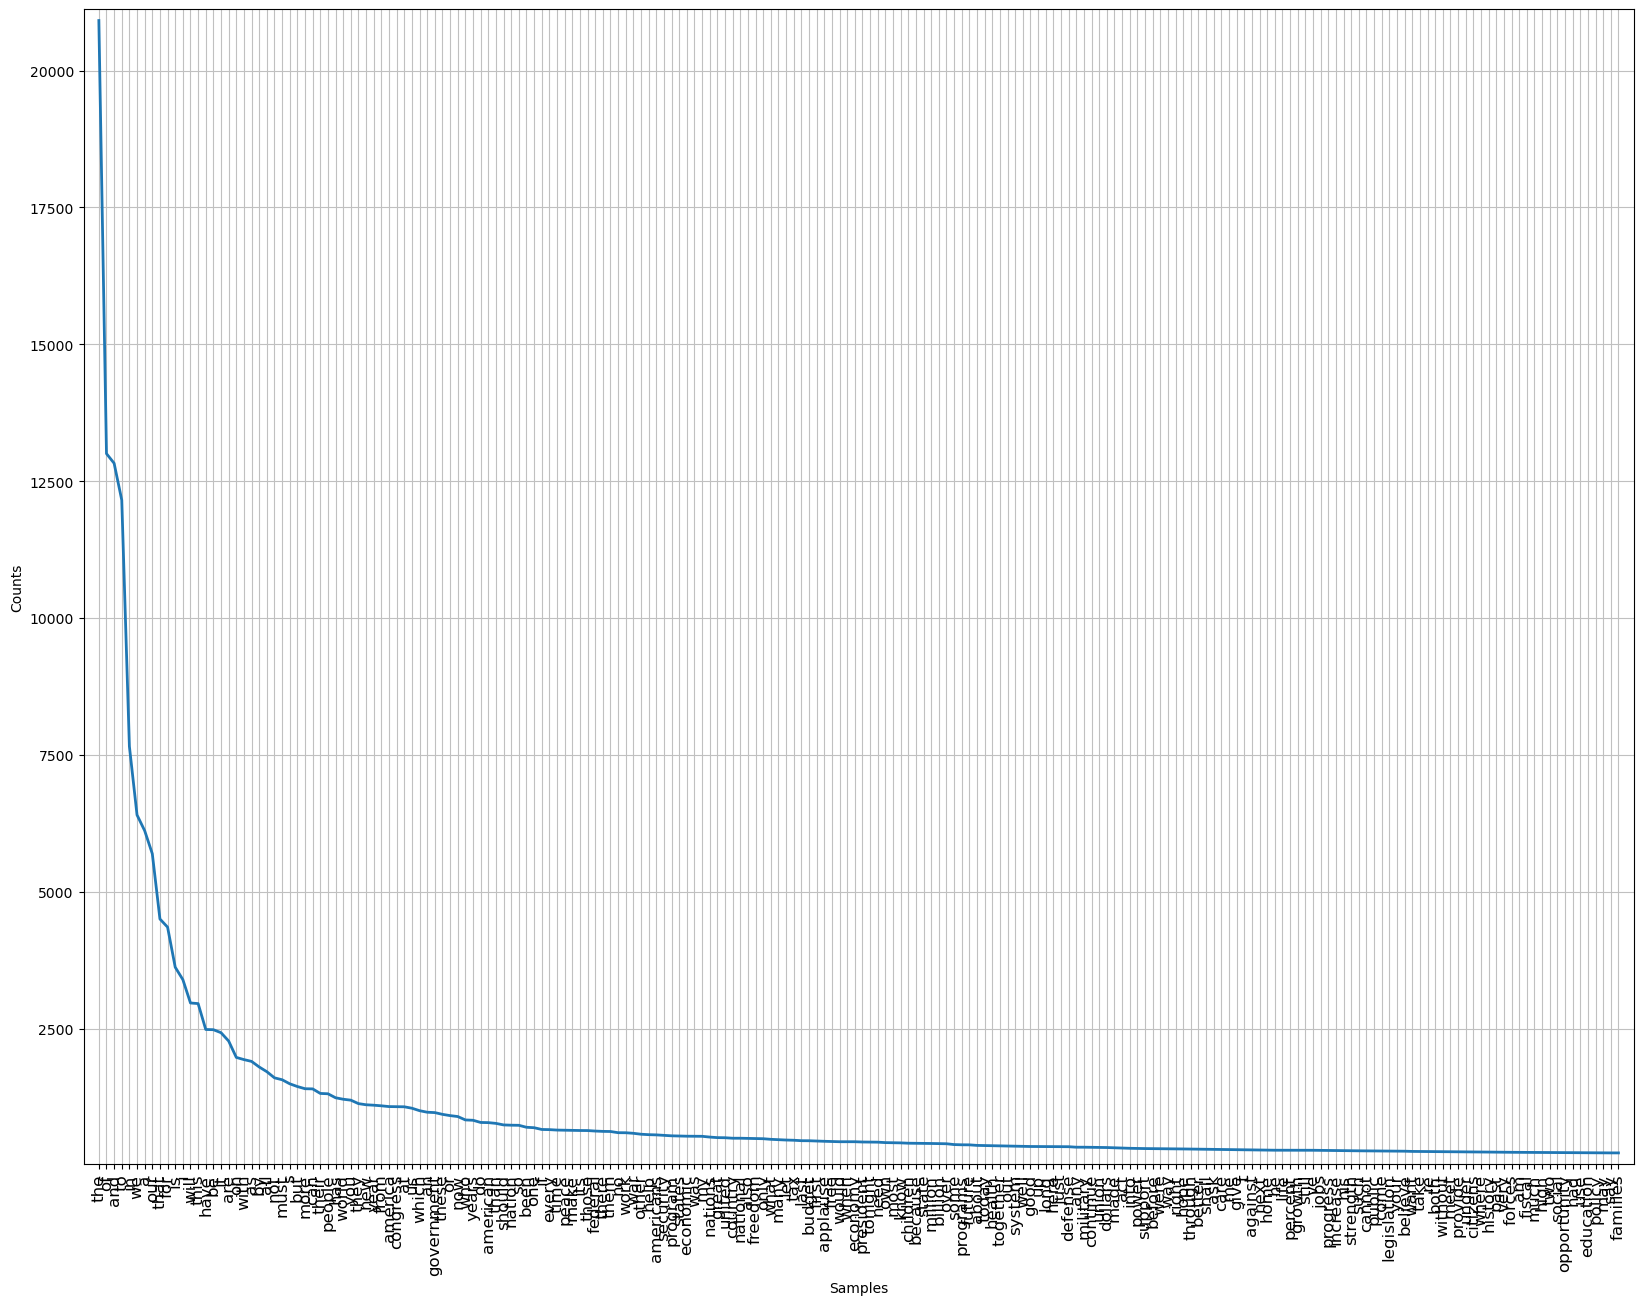

<Axes: xlabel='Samples', ylabel='Counts'>

In [87]:
plt.figure(figsize=(20,15))
plt.margins(0.01)
plt.xticks(fontsize=12)
total_word_freqs.plot(200)

#### Does the observed relative frequency of these words follow Zipf’s law? Explain.

One of the clearest explanations I found of Zipf's law was from [Gizmodo](https://gizmodo.com/the-mysterious-law-that-governs-the-size-of-your-city-1479244159):

>Back in 1949, the linguist George Zipf noticed something odd about how often people use words in a given language. He found that a small number of words are used all the time, while the vast majority are used very rarely. If he ranked the words in order of popularity, a striking pattern emerged. The number one ranked word was always used twice as often as the second rank word, and three times as often as the third rank. He called this a rank vs. frequency rule, and found that it could also be used to describe income distributions in any given country, with the richest person making twice as much money as the next richest, and so forth.

In other words, Zipf's Law is a linguistic principle that states that in a large text corpus, the frequency of any word is inversely proportional to its rank in the frequency table.

Unfortunately, just glancing at the frequencies of our top 200 words, it appears this isn't the case i.e. the words are more frequent than we might expect. i.e. 13004 is more half of 20914. And 12828 is well more than a third of 20914 (it's 61%!). Likewise, the other top 10 words do not seem to follow the rule either...

In [140]:
limit=10
for idx, word in enumerate(top200, 1):
    if idx<=limit:
        print(idx, word)

1 ('the', 20914)
2 ('of', 13004)
3 ('and', 12828)
4 ('to', 12156)
5 ('in', 7657)
6 ('we', 6405)
7 ('a', 6118)
8 ('our', 5697)
9 ('that', 4505)
10 ('for', 4356)


The differences are well over 100%, in some cases 200% from expected counts.

In [208]:
Zipfs_check = pd.DataFrame(top200)
Zipfs_check.index = np.arange(1, len(Zipfs_check)+1)
Zipfs_check.columns=('Word', 'Count')
index_values = Zipfs_check.index.values.tolist()
Zipfs_check['Zipf\'s count'] = [round(20914/x, 1) for x in index_values]
Zipfs_check['% differential'] = round(Zipfs_check['Count']/Zipfs_check['Zipf\'s count'] * 100, 1)

Zipfs_check.head(10)

,Word,Count,Zipf's count,% differential
1,the,20914,20914.0,100.0
2,of,13004,10457.0,124.4
3,and,12828,6971.3,184.0
4,to,12156,5228.5,232.5
5,in,7657,4182.8,183.1
6,we,6405,3485.7,183.8
7,a,6118,2987.7,204.8
8,our,5697,2614.2,217.9
9,that,4505,2323.8,193.9
10,for,4356,2091.4,208.3


#### In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

This question is difficult to quantify here. But, from a qualitative viewpoint, the words here are not colloquial English, but rather a collection of political speeches with certain stirring qualities across a time period of at least 70 years. Given both the English language style and the variation across speeches, it may not be entirely surprising that they differ from Zipf's law. On the other hand, together they do offer a decently large corpus of over 350,000 words, which should show at least some correlation to Zipf's law.